In [6]:
import os
import VGG_help
from VGG_help import prepare_dataset, test_on_data, plot_train_history, plot_confusion_matrix
# from VGG_help import vgg_model, resnet_model, swin_transformer_model, cv_train_model, cv_train_vgg_model
from VGG_help import vgg_model, resnet_model, cv_train_and_evaluate_model, train_and_evaluate_model, cv_train_model, cv_train_vgg_model, imbalanced_cv_train_and_evaluate_model


from tensorflow.keras.models import load_model

In [7]:
# !'/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/bin/python' -m pip install tensorflow_addons
# !'/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/bin/python' -m pip install tensorflow==2.12


In [8]:
VGG_help.sns.set_theme()
path_dir = VGG_help.os.getcwd()
VGG_help.np.random.seed(123)
VGG_help.tf.random.set_seed(123)


# Train on all Test on Random Data

In [11]:
dataset_dir_org = f'{path_dir}/Archive/Dataset/All_Data'
dataset_dir_ddpm_rand = f'{path_dir}/Balanced_Data/Random_Images/DDPM'
dataset_dir_pggans150_rand = f'{path_dir}/Balanced_Data/Random_Images/PGGANS150'
dataset_dir_pggans160_rand = f'{path_dir}/Balanced_Data/Random_Images/PGGANS160'
# test_dataset_dir = f'{path_dir}/Imbalanced_Data/Selected_Images/Test_selected_imbalanced'
# test_dataset_dir1 = f'{path_dir}/Imbalanced_Data/Selected_Images/Test/dataset_1'
# test_dataset_dir2 = f'{path_dir}/Imbalanced_Data/Selected_Images/Test/dataset_2'
# test_dataset_dir3 = f'{path_dir}/Imbalanced_Data/Selected_Images/Test/dataset_3'


class_labels = sorted(os.listdir(dataset_dir_org))
print('class_labels: ', class_labels)
num_classes = 2
input_shape=(128, 128, 3)

cv=1
epochs=10
batch_size=32

class_labels:  ['NORMAL', 'PNEUMONIA']


## VGG16

Class labels: ['NORMAL', 'PNEUMONIA']
Epoch 1/10
91/91 [==============================] - 27s 286ms/step - loss: 7.0187 - accuracy: 0.8903 - val_loss: 0.8505 - val_accuracy: 0.9515
Epoch 2/10
91/91 [==============================] - 26s 282ms/step - loss: 0.2838 - accuracy: 0.9611 - val_loss: 0.1768 - val_accuracy: 0.9598
Epoch 3/10
91/91 [==============================] - 26s 284ms/step - loss: 0.1024 - accuracy: 0.9729 - val_loss: 0.1374 - val_accuracy: 0.9598
Epoch 4/10
91/91 [==============================] - 26s 284ms/step - loss: 0.0813 - accuracy: 0.9754 - val_loss: 0.1875 - val_accuracy: 0.9626
Epoch 5/10
91/91 [==============================] - 26s 283ms/step - loss: 0.0695 - accuracy: 0.9802 - val_loss: 0.1213 - val_accuracy: 0.9626
Epoch 6/10
91/91 [==============================] - 26s 283ms/step - loss: 0.0431 - accuracy: 0.9823 - val_loss: 0.0974 - val_accuracy: 0.9764
Epoch 7/10
91/91 [==============================] - 26s 284ms/step - loss: 0.0321 - accuracy: 0.9861 - v

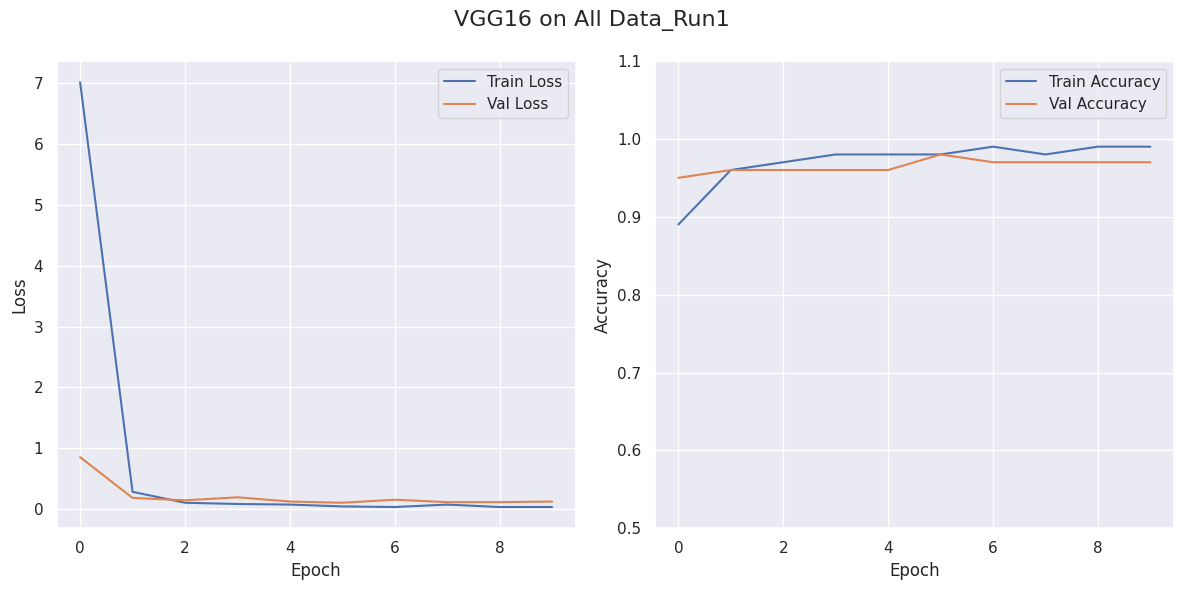

Testing on Dataset 1
122/122 [==============================] - 27s 221ms/step
Test Metrics for Dataset 1: {'Test Loss': 0.271, 'Test Accuracy': 0.9144, 'F1 Score': 0.91, 'Sensitivity (Recall)': 0.91, 'Precision': 0.93}


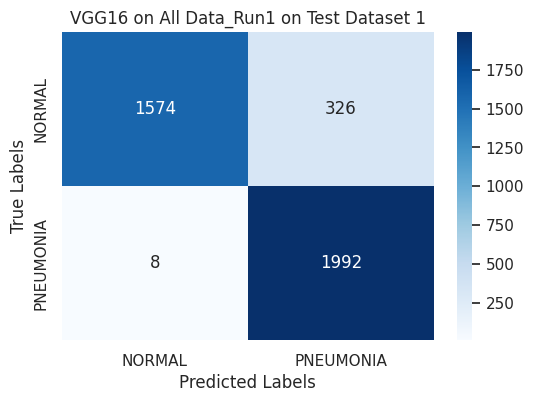

Testing on Dataset 2
125/125 [==============================] - 28s 222ms/step
Test Metrics for Dataset 2: {'Test Loss': 1.9606, 'Test Accuracy': 0.6585, 'F1 Score': 0.61, 'Sensitivity (Recall)': 0.66, 'Precision': 0.8}


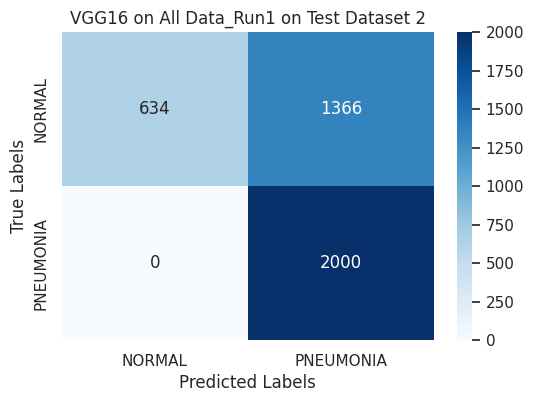

Testing on Dataset 3
125/125 [==============================] - 28s 222ms/step
Test Metrics for Dataset 3: {'Test Loss': 3.9323, 'Test Accuracy': 0.6768, 'F1 Score': 0.64, 'Sensitivity (Recall)': 0.68, 'Precision': 0.8}


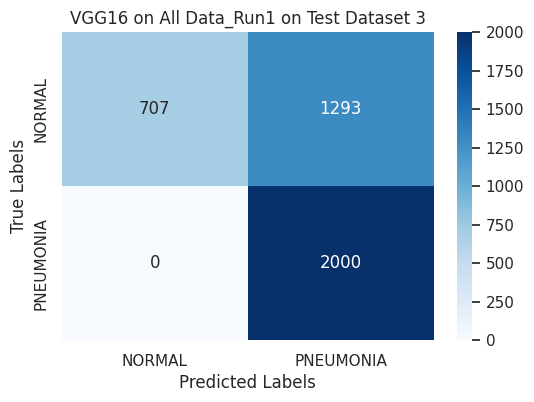

In [16]:
   
title = "VGG16 on All Data"
file_name = "Trained_Models/training_history_plot_original_S.png"

for i in range(0, 1):
    trained_model, test_metrics, confusion_matrix = imbalanced_cv_train_and_evaluate_model(
        dataset_dir_org, 
        dataset_dir_ddpm_rand, 
        dataset_dir_pggans150_rand, 
        dataset_dir_pggans160_rand, 
        class_labels,  
        vgg_model,
        weights="imagenet",
        input_shape= input_shape, 
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size       
    )

## Resnet50

Class labels: ['NORMAL', 'PNEUMONIA']
Epoch 1/10
91/91 [==============================] - 20s 194ms/step - loss: 2.7768 - accuracy: 0.9160 - val_loss: 1.3261 - val_accuracy: 0.9348
Epoch 2/10
91/91 [==============================] - 17s 182ms/step - loss: 0.3804 - accuracy: 0.9524 - val_loss: 0.1241 - val_accuracy: 0.9542
Epoch 3/10
91/91 [==============================] - 16s 180ms/step - loss: 0.0971 - accuracy: 0.9712 - val_loss: 0.1350 - val_accuracy: 0.9626
Epoch 4/10
91/91 [==============================] - 17s 184ms/step - loss: 0.0696 - accuracy: 0.9774 - val_loss: 0.1236 - val_accuracy: 0.9639
Epoch 5/10
91/91 [==============================] - 17s 185ms/step - loss: 0.0449 - accuracy: 0.9851 - val_loss: 0.1324 - val_accuracy: 0.9639
Epoch 6/10
91/91 [==============================] - 17s 186ms/step - loss: 0.0522 - accuracy: 0.9820 - val_loss: 0.0819 - val_accuracy: 0.9723
Epoch 7/10
91/91 [==============================] - 17s 185ms/step - loss: 0.0421 - accuracy: 0.9844 - v

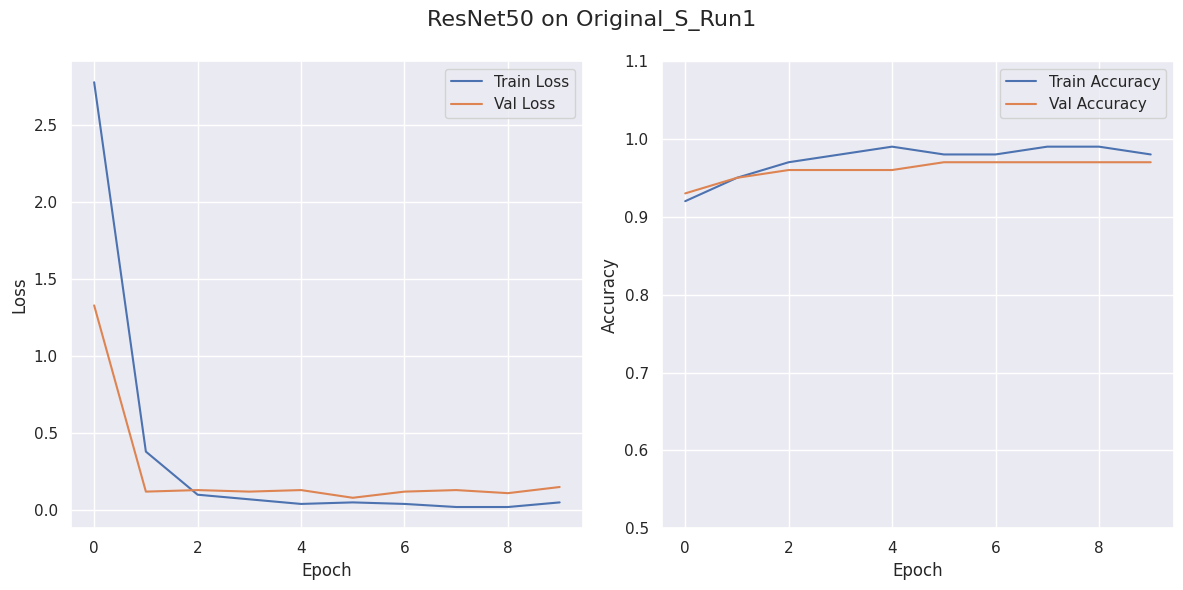

Testing on Dataset 1
122/122 [==============================] - 16s 121ms/step
Test Metrics for Dataset 1: {'Test Loss': 0.1634, 'Test Accuracy': 0.9605, 'F1 Score': 0.96, 'Sensitivity (Recall)': 0.96, 'Precision': 0.96}


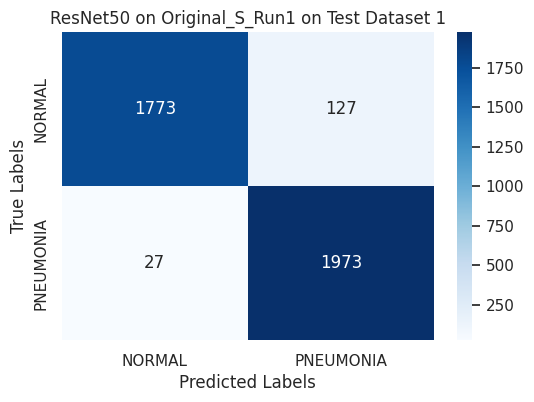

Testing on Dataset 2
125/125 [==============================] - 15s 119ms/step
Test Metrics for Dataset 2: {'Test Loss': 2.6152, 'Test Accuracy': 0.6685, 'F1 Score': 0.63, 'Sensitivity (Recall)': 0.67, 'Precision': 0.8}


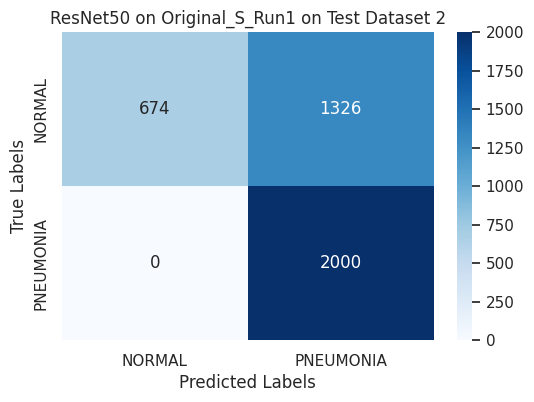

Testing on Dataset 3
125/125 [==============================] - 15s 119ms/step
Test Metrics for Dataset 3: {'Test Loss': 3.1234, 'Test Accuracy': 0.654, 'F1 Score': 0.61, 'Sensitivity (Recall)': 0.65, 'Precision': 0.79}


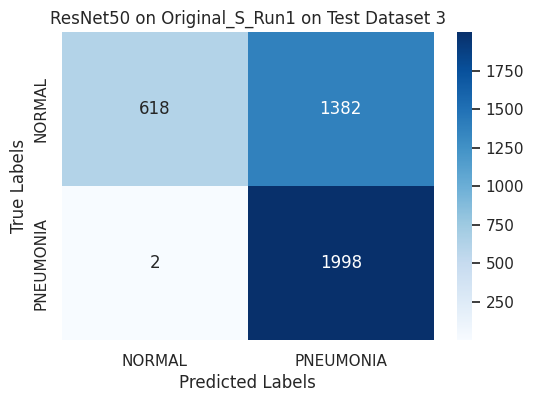

In [18]:
title = "ResNet50 on Original_S"
file_name = "Trained_Models/ResNet50_training_history_plot_original_S.png"

for i in range(0, 1):
    trained_model, test_metrics, confusion_matrix = imbalanced_cv_train_and_evaluate_model(
        dataset_dir_org, 
        dataset_dir_ddpm_rand, 
        dataset_dir_pggans150_rand, 
        dataset_dir_pggans160_rand, 
        class_labels,  
        resnet_model, 
        weights="imagenet",
        input_shape= input_shape, 
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

# Train on all Test on Greedy K Data

In [12]:
dataset_dir_ddpm_greedy = f'{path_dir}/Balanced_Data/Selected_Images/DDPM'
dataset_dir_pggans150_greedy = f'{path_dir}/Balanced_Data/Selected_Images/PGGANS150'
dataset_dir_pggans160_greedy = f'{path_dir}/Balanced_Data/Selected_Images/PGGANS160'


class_labels = sorted(os.listdir(dataset_dir_ddpm_greedy))
print('class_labels: ', class_labels)
num_classes = 2
input_shape=(128, 128, 3)

cv=1
epochs=10
batch_size=32

class_labels:  ['NORMAL', 'PNEUMONIA']


## VGG16

Class labels: ['NORMAL', 'PNEUMONIA']
Epoch 1/10
91/91 [==============================] - 26s 283ms/step - loss: 4.4264 - accuracy: 0.9045 - val_loss: 0.8526 - val_accuracy: 0.9223
Epoch 2/10
91/91 [==============================] - 25s 279ms/step - loss: 0.2458 - accuracy: 0.9615 - val_loss: 0.1497 - val_accuracy: 0.9653
Epoch 3/10
91/91 [==============================] - 26s 281ms/step - loss: 0.0964 - accuracy: 0.9705 - val_loss: 0.1197 - val_accuracy: 0.9653
Epoch 4/10
91/91 [==============================] - 26s 281ms/step - loss: 0.0553 - accuracy: 0.9806 - val_loss: 0.1324 - val_accuracy: 0.9653
Epoch 5/10
91/91 [==============================] - 26s 282ms/step - loss: 0.0606 - accuracy: 0.9813 - val_loss: 0.1498 - val_accuracy: 0.9612
Epoch 6/10
91/91 [==============================] - 26s 281ms/step - loss: 0.0667 - accuracy: 0.9799 - val_loss: 0.1455 - val_accuracy: 0.9598
Epoch 7/10
91/91 [==============================] - 26s 282ms/step - loss: 0.0606 - accuracy: 0.9785 - v

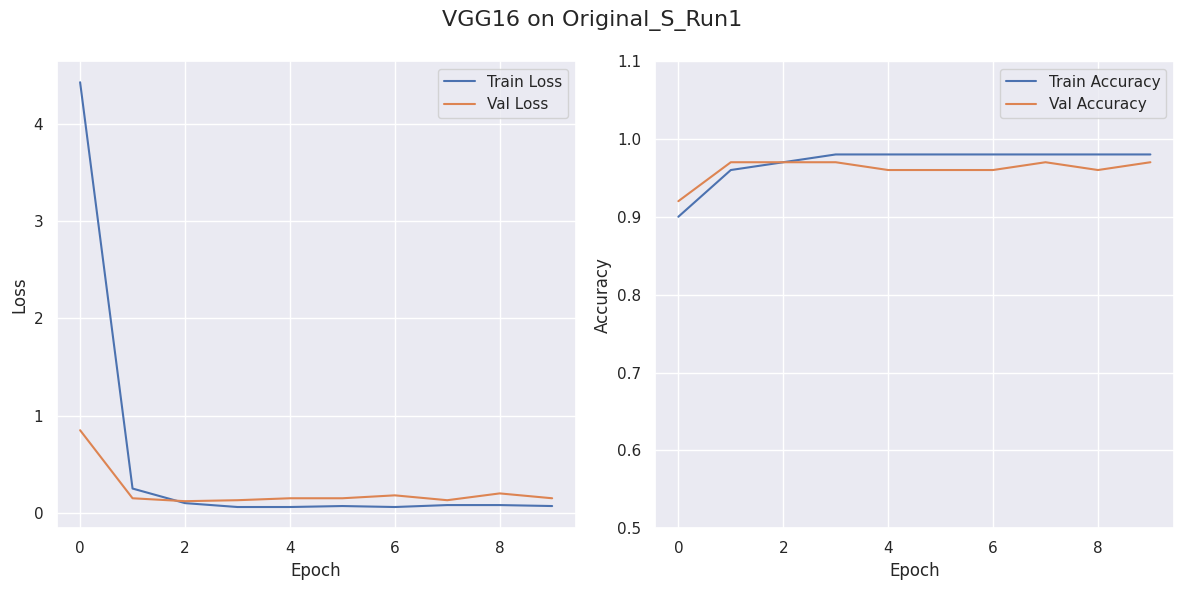

Testing on Dataset 1
125/125 [==============================] - 28s 221ms/step
Test Metrics for Dataset 1: {'Test Loss': 0.3334, 'Test Accuracy': 0.9178, 'F1 Score': 0.92, 'Sensitivity (Recall)': 0.92, 'Precision': 0.93}


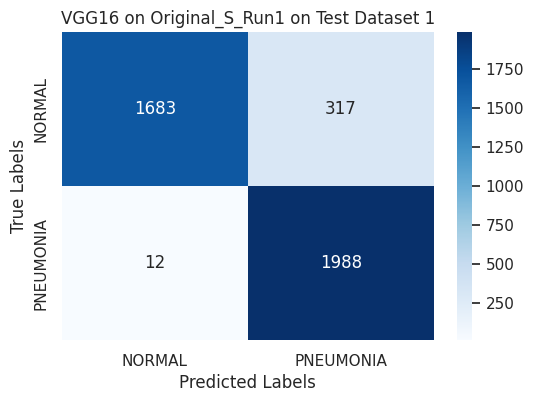

Testing on Dataset 2
125/125 [==============================] - 28s 222ms/step
Test Metrics for Dataset 2: {'Test Loss': 2.1032, 'Test Accuracy': 0.6357, 'F1 Score': 0.58, 'Sensitivity (Recall)': 0.64, 'Precision': 0.79}


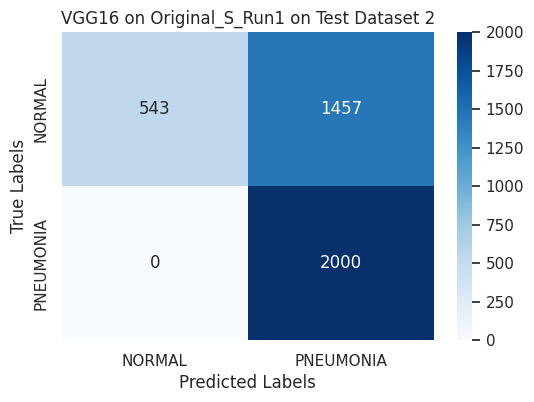

Testing on Dataset 3
125/125 [==============================] - 28s 221ms/step
Test Metrics for Dataset 3: {'Test Loss': 7.5758, 'Test Accuracy': 0.5788, 'F1 Score': 0.49, 'Sensitivity (Recall)': 0.58, 'Precision': 0.77}


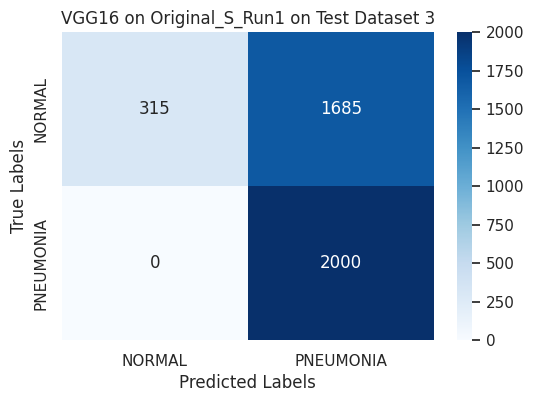

In [17]:
title = "VGG16 on Original_S" 
file_name = "Trained_Models/training_history_plot_original_R.png"

for i in range(0, 1):
    trained_model, test_metrics, confusion_matrix = imbalanced_cv_train_and_evaluate_model(
        dataset_dir_org, 
        dataset_dir_ddpm_greedy, 
        dataset_dir_pggans150_greedy, 
        dataset_dir_pggans160_greedy, 
        class_labels,  
        vgg_model, 
        weights="imagenet",
        input_shape= input_shape, 
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )


## ResNet50

Class labels: ['NORMAL', 'PNEUMONIA']
Epoch 1/10
91/91 [==============================] - 20s 192ms/step - loss: 4.4902 - accuracy: 0.9011 - val_loss: 0.7803 - val_accuracy: 0.9501
Epoch 2/10
91/91 [==============================] - 17s 182ms/step - loss: 0.3282 - accuracy: 0.9646 - val_loss: 0.3075 - val_accuracy: 0.9431
Epoch 3/10
91/91 [==============================] - 16s 181ms/step - loss: 0.1338 - accuracy: 0.9705 - val_loss: 0.2004 - val_accuracy: 0.9653
Epoch 4/10
91/91 [==============================] - 17s 183ms/step - loss: 0.1294 - accuracy: 0.9733 - val_loss: 0.1389 - val_accuracy: 0.9681
Epoch 5/10
91/91 [==============================] - 17s 183ms/step - loss: 0.0612 - accuracy: 0.9806 - val_loss: 0.1272 - val_accuracy: 0.9709
Epoch 6/10
91/91 [==============================] - 17s 186ms/step - loss: 0.0522 - accuracy: 0.9820 - val_loss: 0.1173 - val_accuracy: 0.9723
Epoch 7/10
91/91 [==============================] - 17s 187ms/step - loss: 0.0374 - accuracy: 0.9892 - v

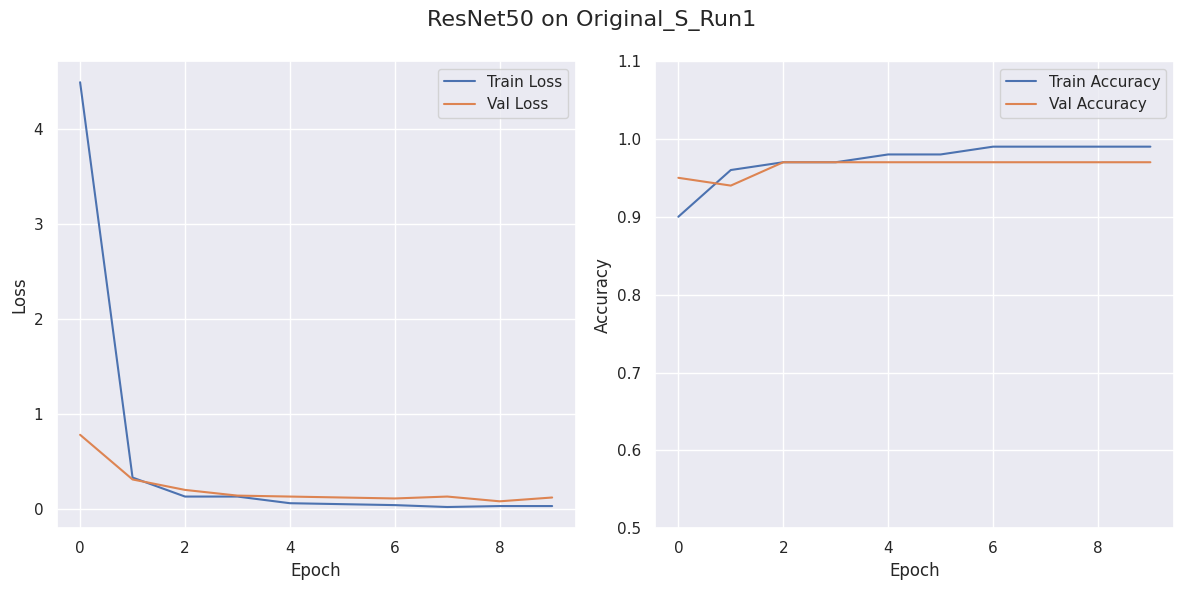

Testing on Dataset 1
125/125 [==============================] - 16s 121ms/step
Test Metrics for Dataset 1: {'Test Loss': 0.1972, 'Test Accuracy': 0.9473, 'F1 Score': 0.95, 'Sensitivity (Recall)': 0.95, 'Precision': 0.95}


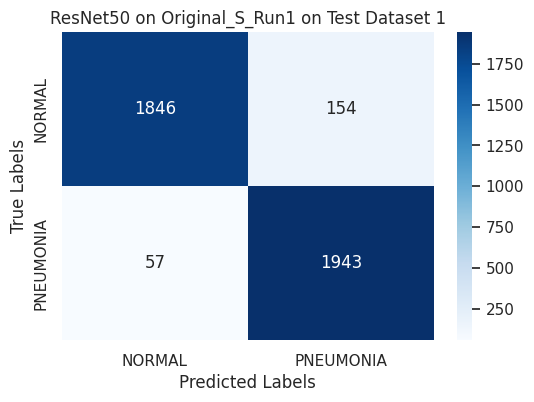

Testing on Dataset 2
125/125 [==============================] - 15s 119ms/step
Test Metrics for Dataset 2: {'Test Loss': 2.4527, 'Test Accuracy': 0.61, 'F1 Score': 0.54, 'Sensitivity (Recall)': 0.61, 'Precision': 0.78}


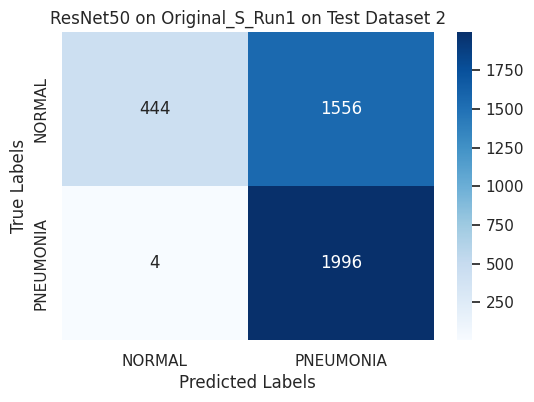

Testing on Dataset 3
125/125 [==============================] - 15s 119ms/step
Test Metrics for Dataset 3: {'Test Loss': 2.7636, 'Test Accuracy': 0.635, 'F1 Score': 0.58, 'Sensitivity (Recall)': 0.64, 'Precision': 0.78}


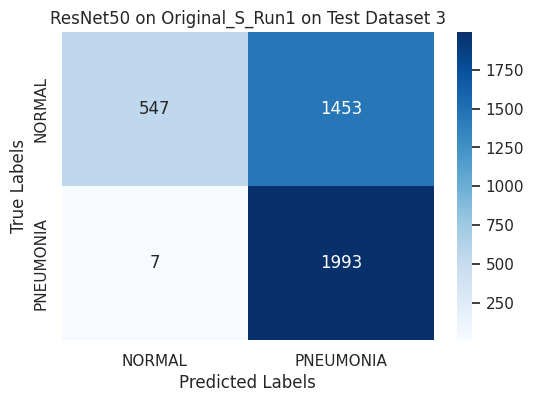

In [16]:

title = "ResNet50 on Original_S"
file_name = "Trained_Models/ResNet50_training_history_plot_original_R.png"

for i in range(0, 1):
    trained_model, test_metrics, confusion_matrix = imbalanced_cv_train_and_evaluate_model(
        dataset_dir_org, 
        dataset_dir_ddpm_greedy, 
        dataset_dir_pggans150_greedy, 
        dataset_dir_pggans160_greedy, 
        class_labels,  
        resnet_model, 
        weights="imagenet",
        input_shape= input_shape, 
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )